# Advanced Computer Vision with Tensorflow 

Distinguishing cats vs dogs, one of the key feature is eyes

<b>Image classification</b>:
- Multi-class classification: Detecting multiple classes in image.<p>Ex- Detecting classes car/person/traffic light in image.</p>   
  - Binary Classification : Detecting two classed in image.<p>Ex- Detecting cat/dog in image</p>
 
- Multi-label classification: Detecting multiple labels in image.<p>Ex- Detecting girl and hat as label in image, instead of detecting it as classes.</p>

<b>Object localization</b>: Identifying object location in image

<b>Object Detection</b> : Classification + Localization. For each object we detect bounding boxes and confidence scores.
  > Popular Algorithms for object detection are -  R-CNN(Regional CNN),Faster-RCNN, YOLO(You Only Look                                Once),SSD(Single Short Detector)
  
<b>Segmentation</b>:Classifying the pixel accoreding to object in image.
- Semantic Segmentation: All objects of same type forms a single classification. 
> <p>Ex- All people in image are single class and assigned same color.</p>
                         Popular models for semantic segmentation are <a href="https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/">U-Net</a>, 
                          <a href="https://arxiv.org/abs/1411.4038">Fully CNN</a>, <a href="http://liangchiehchen.com/projects/DeepLab.html">DeepLab</a></p>
                         
                         
- Instant Segmentation: Object of same type are treated differently.
> <p>Ex- All people are assigned different colors.</p>
 Popular model for instant segmentation is <a href="https://arxiv.org/abs/1703.06870">Mask R-CNN </a></p>


### Transfer Learning
Conceptually earlier layers of CNN extract low level features like edges and deeper layers extract high level features like shapes

The idea of reusing learning from previously trained models(trained on large dataset) and training it for downstream task i.e training last layers is called Transfer learning.

Advantages of Transfer learning:

<p>1.It saves time and cost.</p>

<p>2.Improve performance for smaller dataset</p>

Generally we will freeze convolution layers(feature extractor) and train fully connected layers(Classifier layers)

The method of using pretrained weights and further training them on our dataset is called Fine-tuning

### Object Detection

Non-maximum suppression(NMS) : The process of discarding bounding boxes of lower IOU and keeping highest bounding box IOU .

Two stages of object detection:
- region proposal
- object detection and classification

<a href="https://arxiv.org/abs/1311.2524">Regional-CNN(R-CNN)</a>:

Input image --> Extract region proposals(it extracts around 2k regions using segmentaion) --> warped regions(extracted regions are changed to meet alexnet resolution) --> Compute CNN features (using Alex net architecture) --> Classifier (using SVM) & Regression (for computing bounding box)

Transfer learning for R-CNN:
- Pre-train : Train CNN model with large auxiliary data to learn general specific features
- Fine-tune : To learn domain specific task on warped region proposals.

R-CNN Disadvantages:
- It is slow and computationally expensive to train 2000 regional proposals with CNNs.
- Memory, it needs multiple classifiers for each object

<a href="https://arxiv.org/abs/1504.08083">Fast_R-CNN</a>:
- It dosent use selective search algorithm for regions, it expects as inputs instead of generating itself.
- CNN processes the image and outputs features which is called feature map. It is called feature map detected features are     stored relative to image position
- We use input region proposals and extract region of interest from features maps, these are called region proposal feature maps. This maps are for specific proposed region.
- Downsample feature maps with pooling layers to get fixed length maps
- Flatten --> dense layers --> classifier & Regressor

<div>
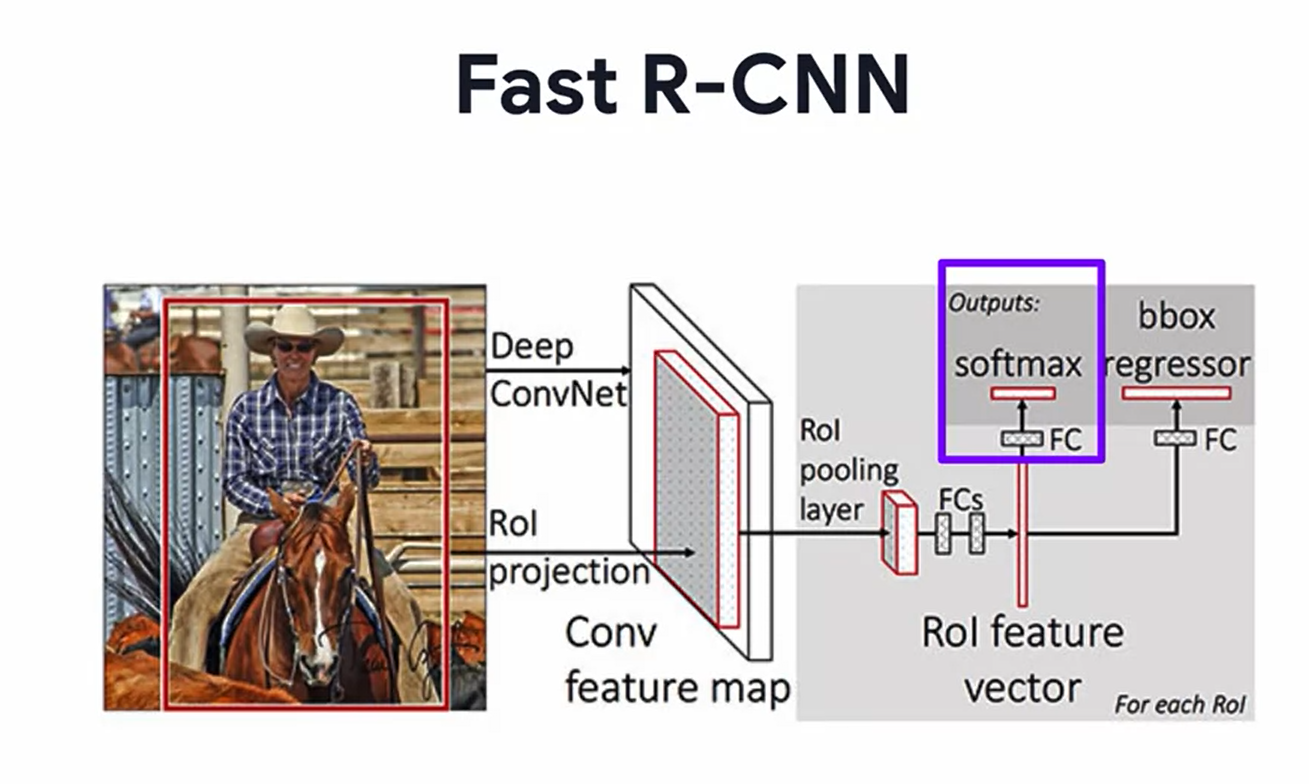
</div>


Faster R-CNN:
- Difference b/w Fast R-CNN and Faster R-CNN is Faster R-CNN generated region proposals with Region Proposal Network

<div>
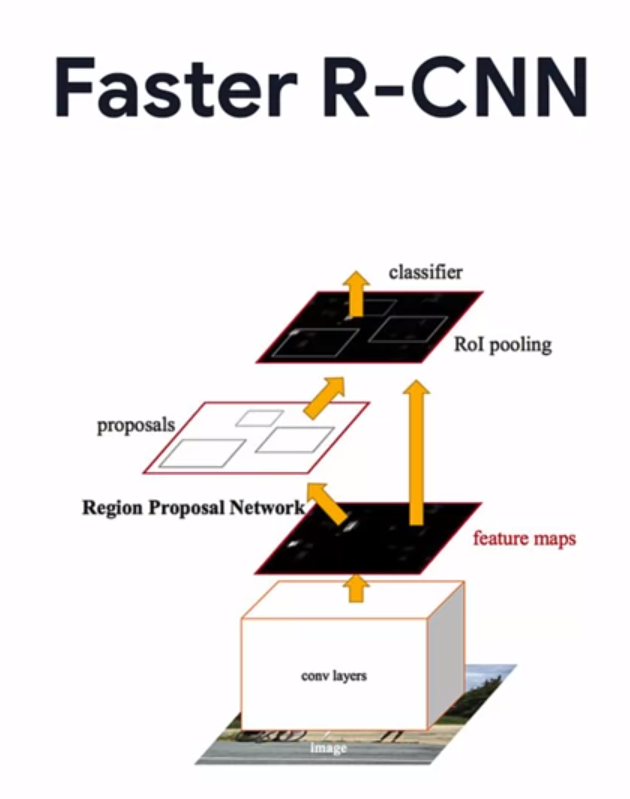
</div>

Checkpoint - It is tensorflow object which stores only model weights without architecture details

Focal loss - It applies modulating term to cross entropy loss in order to focus learning on hard misclassified examples.

<a href="https://arxiv.org/abs/1708.02002">RetinaNet</a>:   It is Single Dense Detector (SDD) build on idea using focal loss

<div>
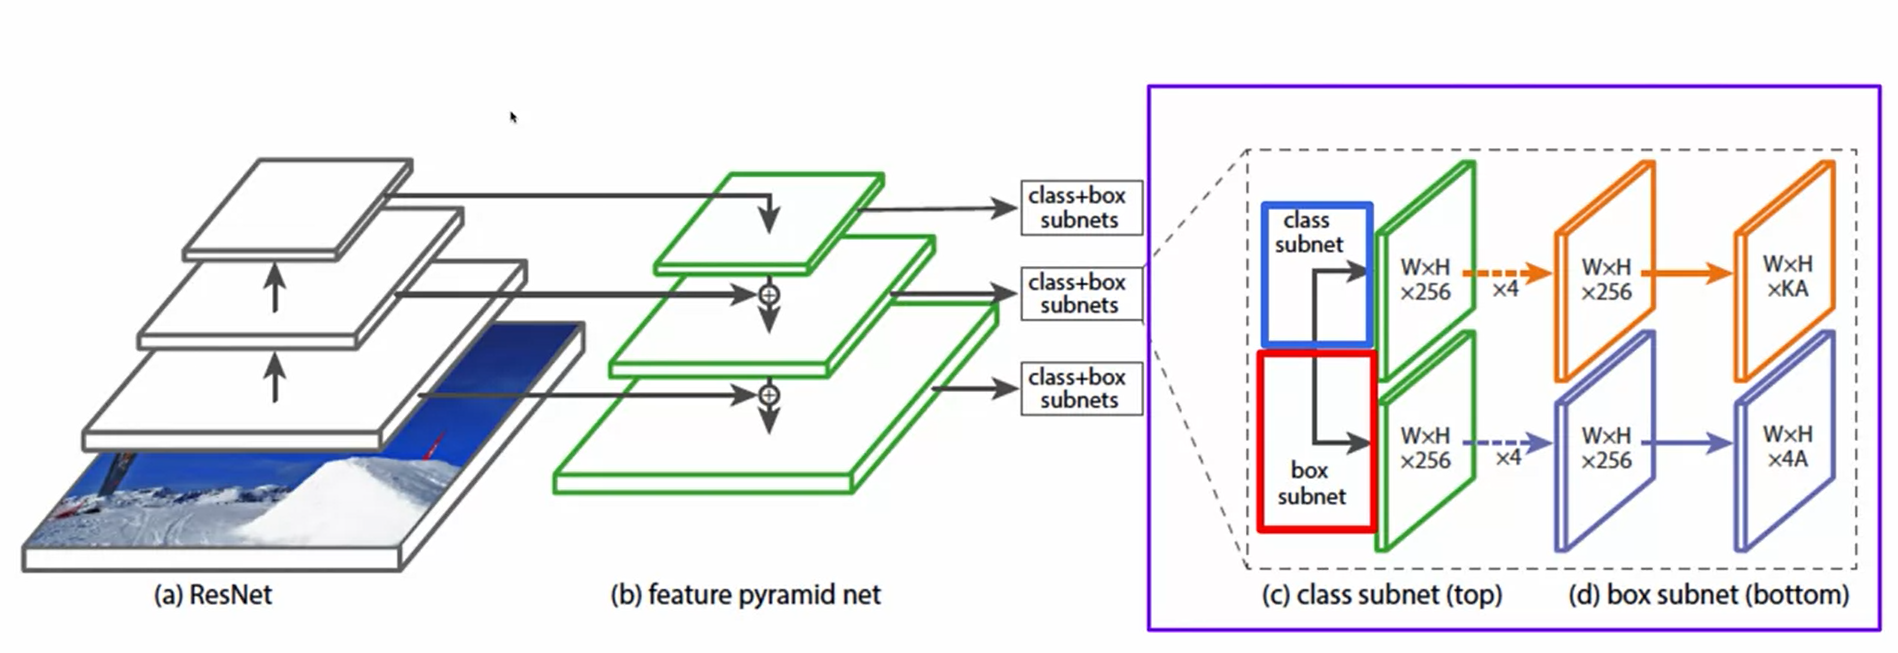
</div>



### Image Segmentation

<b>Image Segmentation Basic Architecture</b>:

<div>
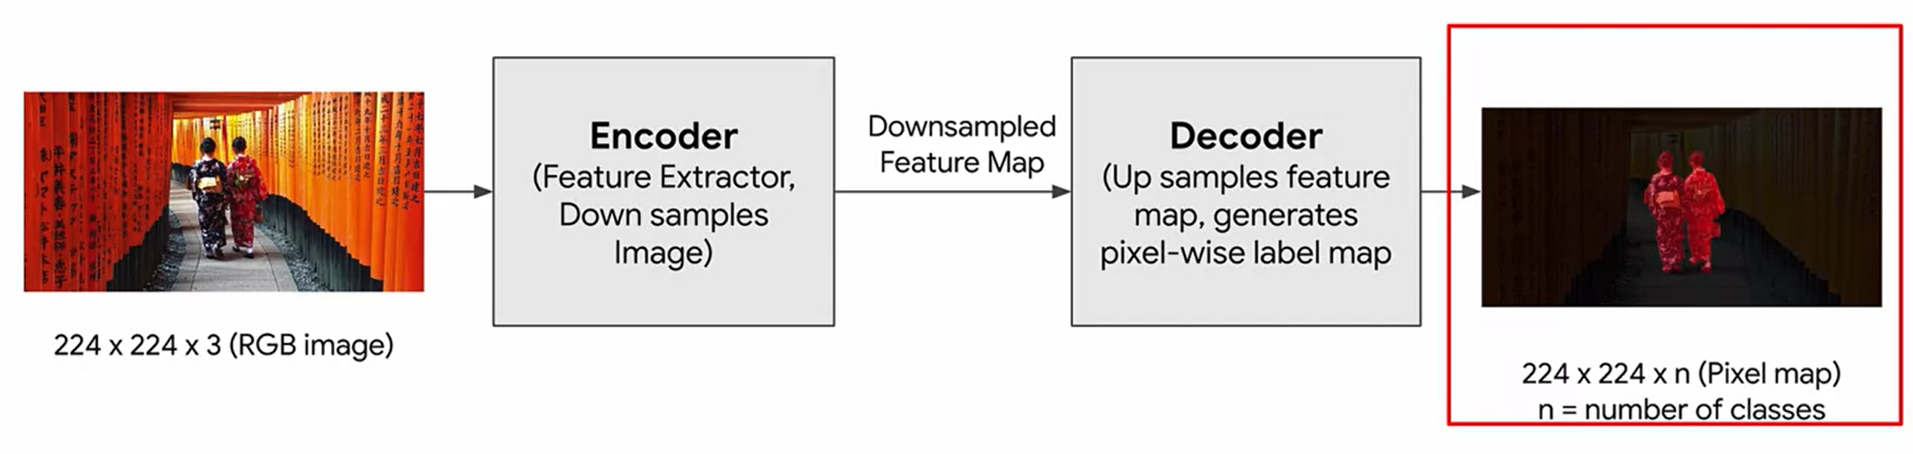
</div>

<b>Encoder</b>:
- CNN without fully connected layers
- Aggregates low level feature to high level features and generated feature maps

<b>Decoder</b>:
- Replaces fully connected layers in a CNN
- upsamples feature maps to original image with help of transpose convolution to generate pixel maps

<b>Popular Architectures for segmentaion</b>:

<a href="https://arxiv.org/pdf/1411.4038.pdf">Fully Convolutional Neural Networks(FCN)</a>:
- SegNet
- U-Net
- PSPNet
- Mask-RCNN

<b>FCN</b>:

<div>
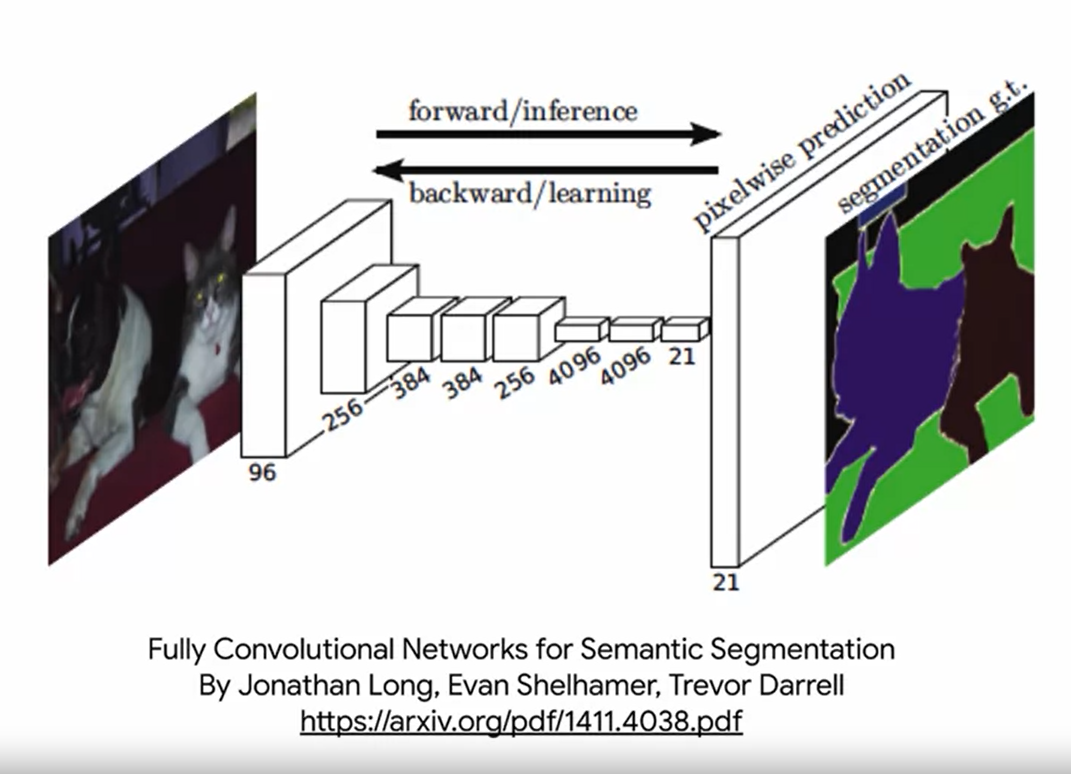
</div>

Encoder : We use convolutional layer of popular architectures like VGG-16, ResNet-50, MobileNet for feature extraction and don't use fully connected layers

Decoder:

<div>
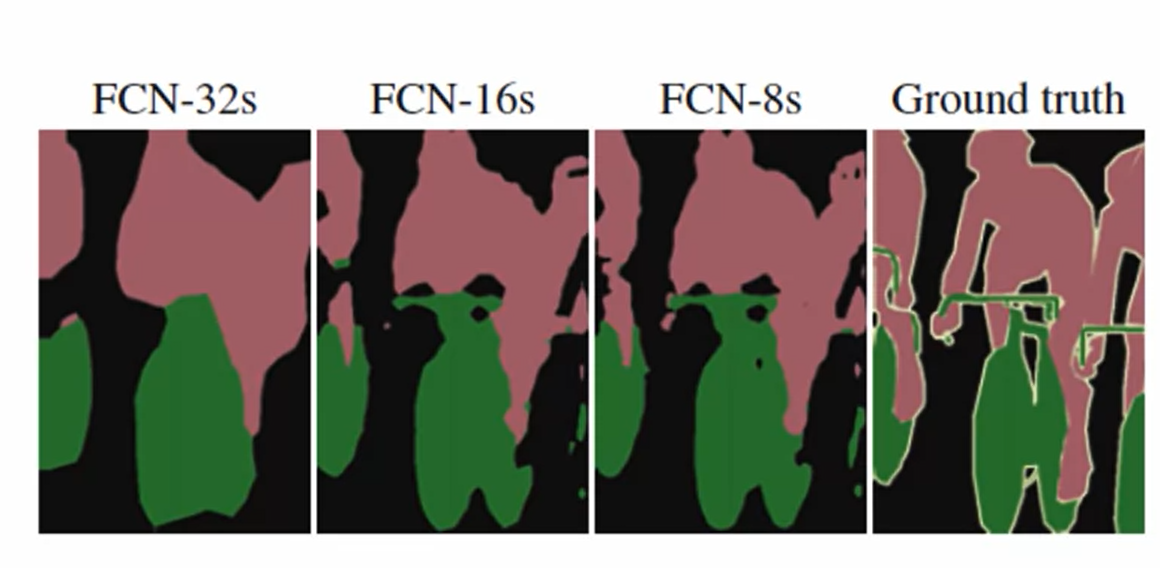
</div>

FCN-32s:

<div>
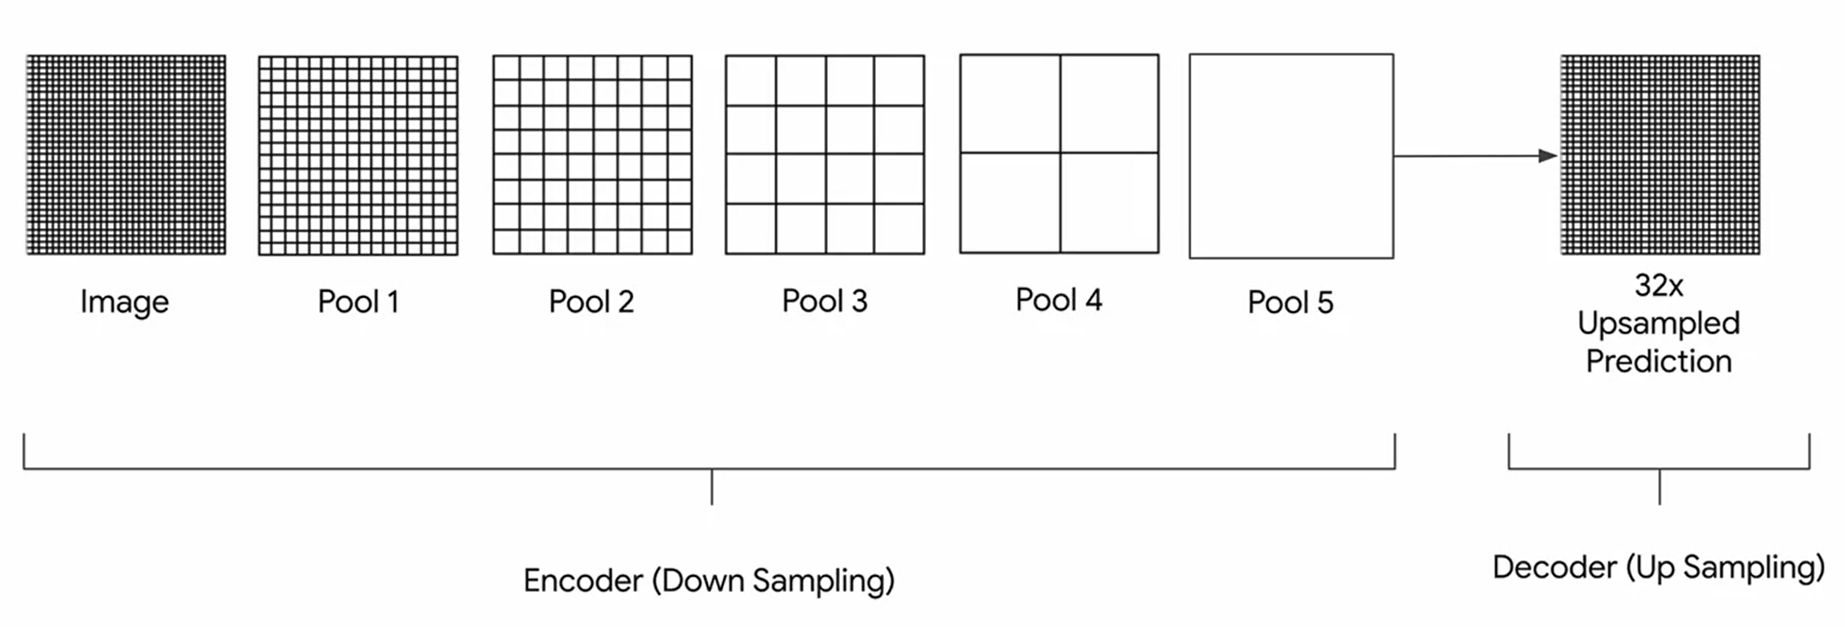
</div>

FCN-16s:

<div>
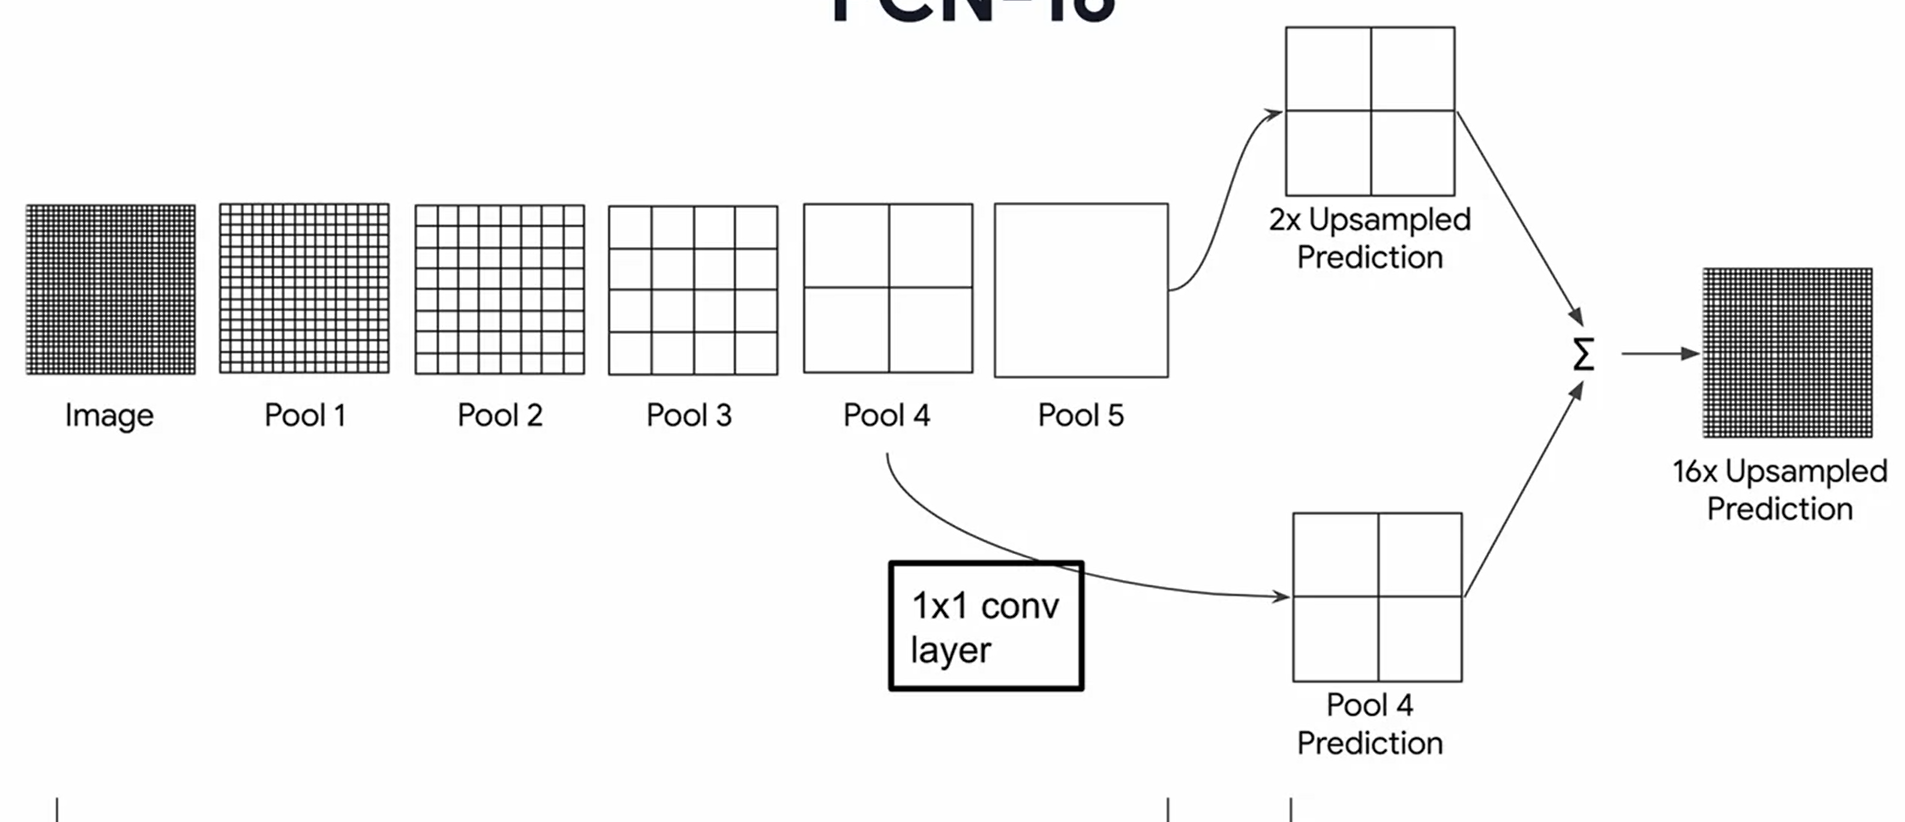
</div>

FCN-8s:

<div>
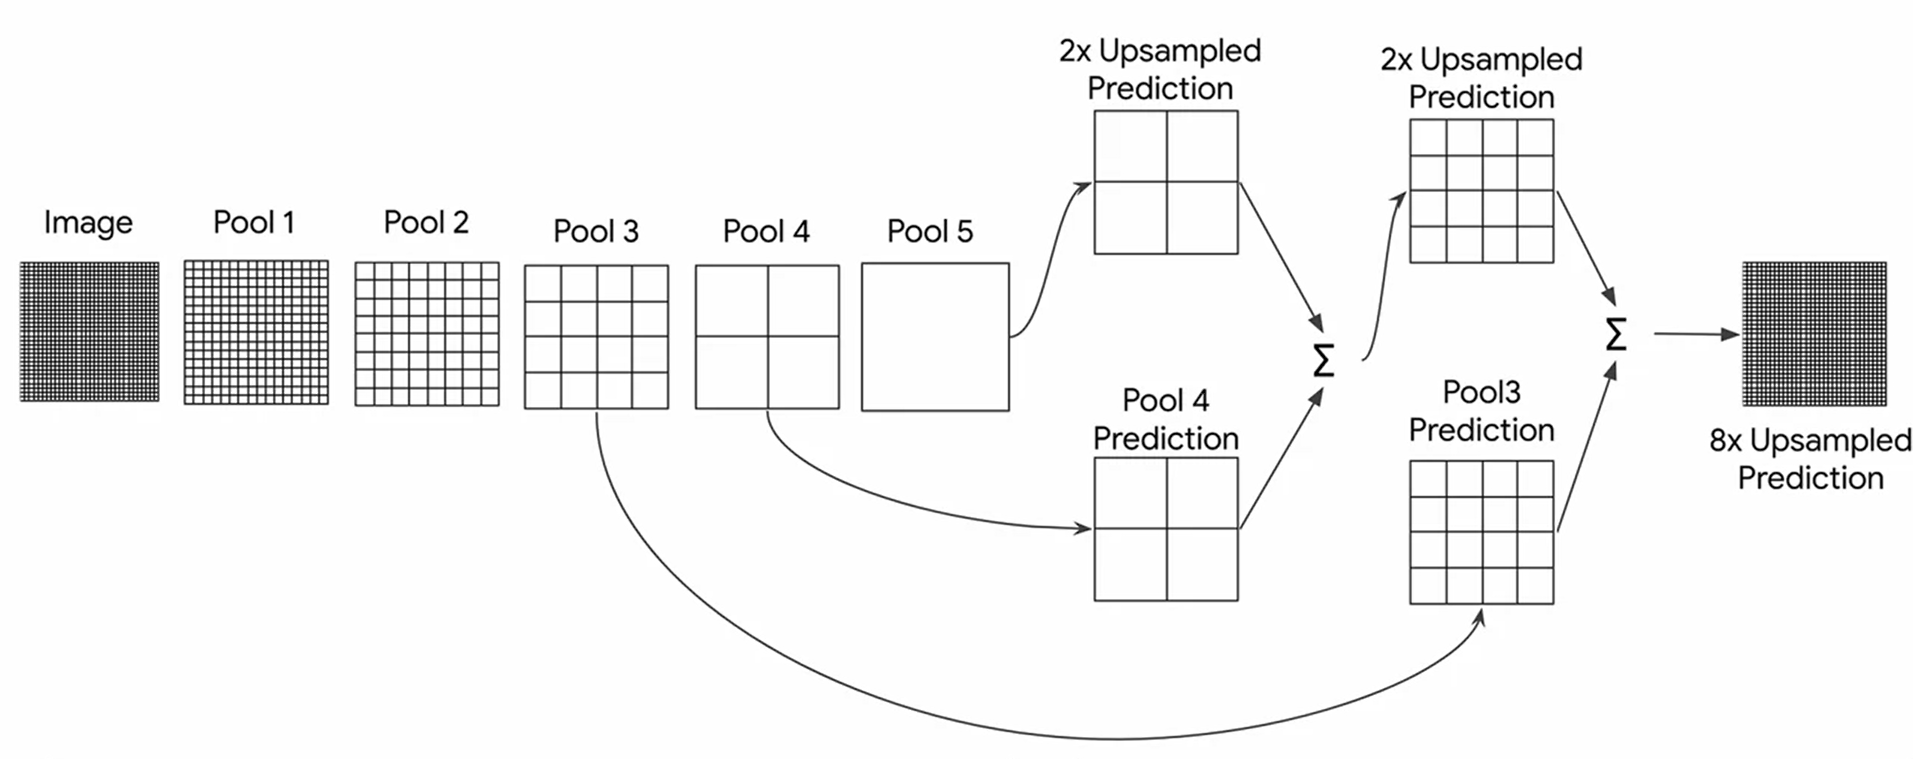
</div>

Note: 's' here indicates stride, the lesser stride, the more information it captures so high resolution and closer to gt(ground truth)

Upsampling is increasing height and width of feature map.

Two types of upsampling in Tensorflow are :
 - Simple Scaling(UpSampling2D) : It scales up images in two ways-
    - Nearest - Copies value from nearest pixel
    - Bilinear - Linear interpolation from nearby pixels
    
- Transposed Convolution(Conv2DTranspose): <p>It is reverse of convolution, which is applied to output of convolution operation.It                                            uses convolution of specifized size and stride in order to recreate the original                                                input before convolution operation</p>

<b>SegNet</b>:

We have symmetry in encoder and decoder layers.
<div>
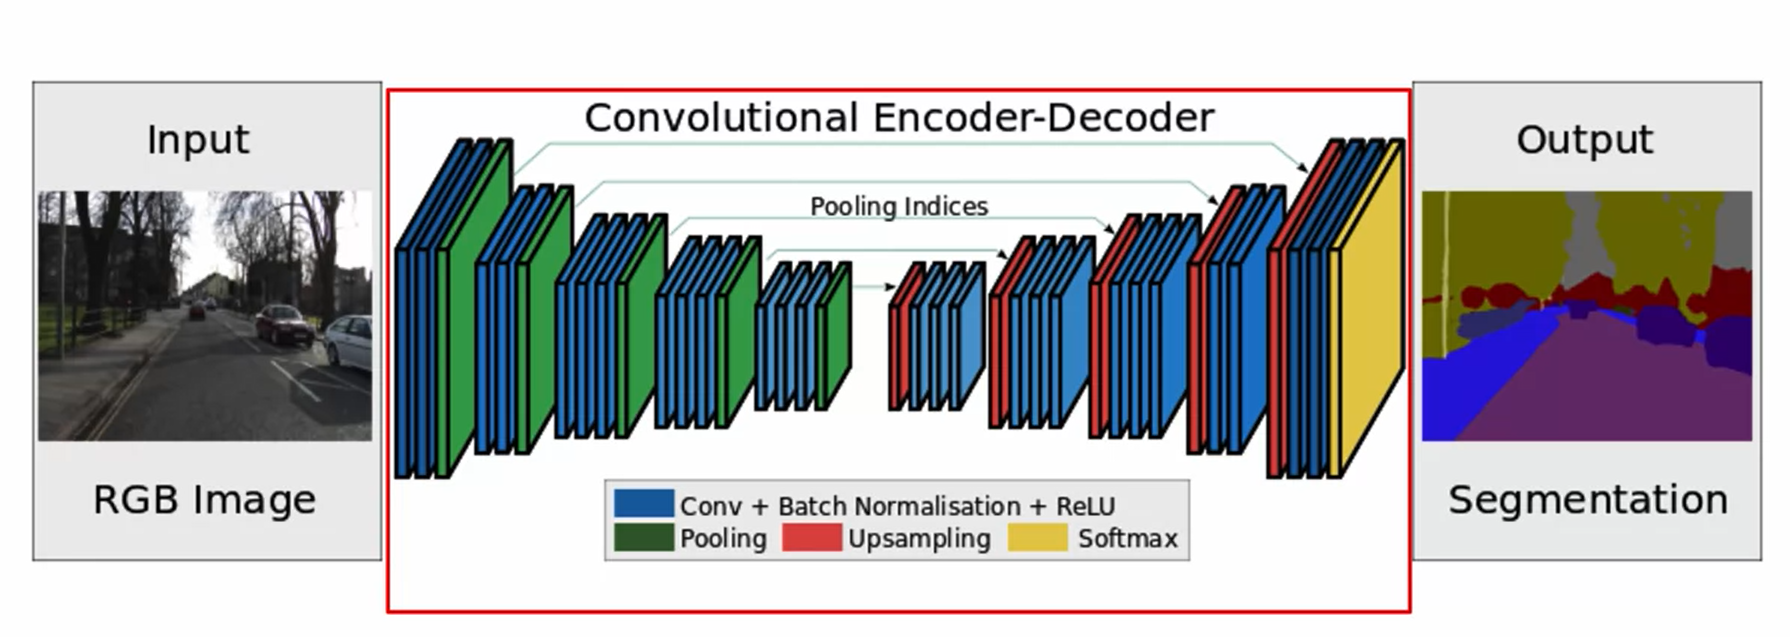
</div>

<a href="https://arxiv.org/pdf/1505.04597.pdf">U-Net</a>:

It's name indicates shape of architecture. It has additional skip connection compared to FCN(which has only upsampling)
<div>
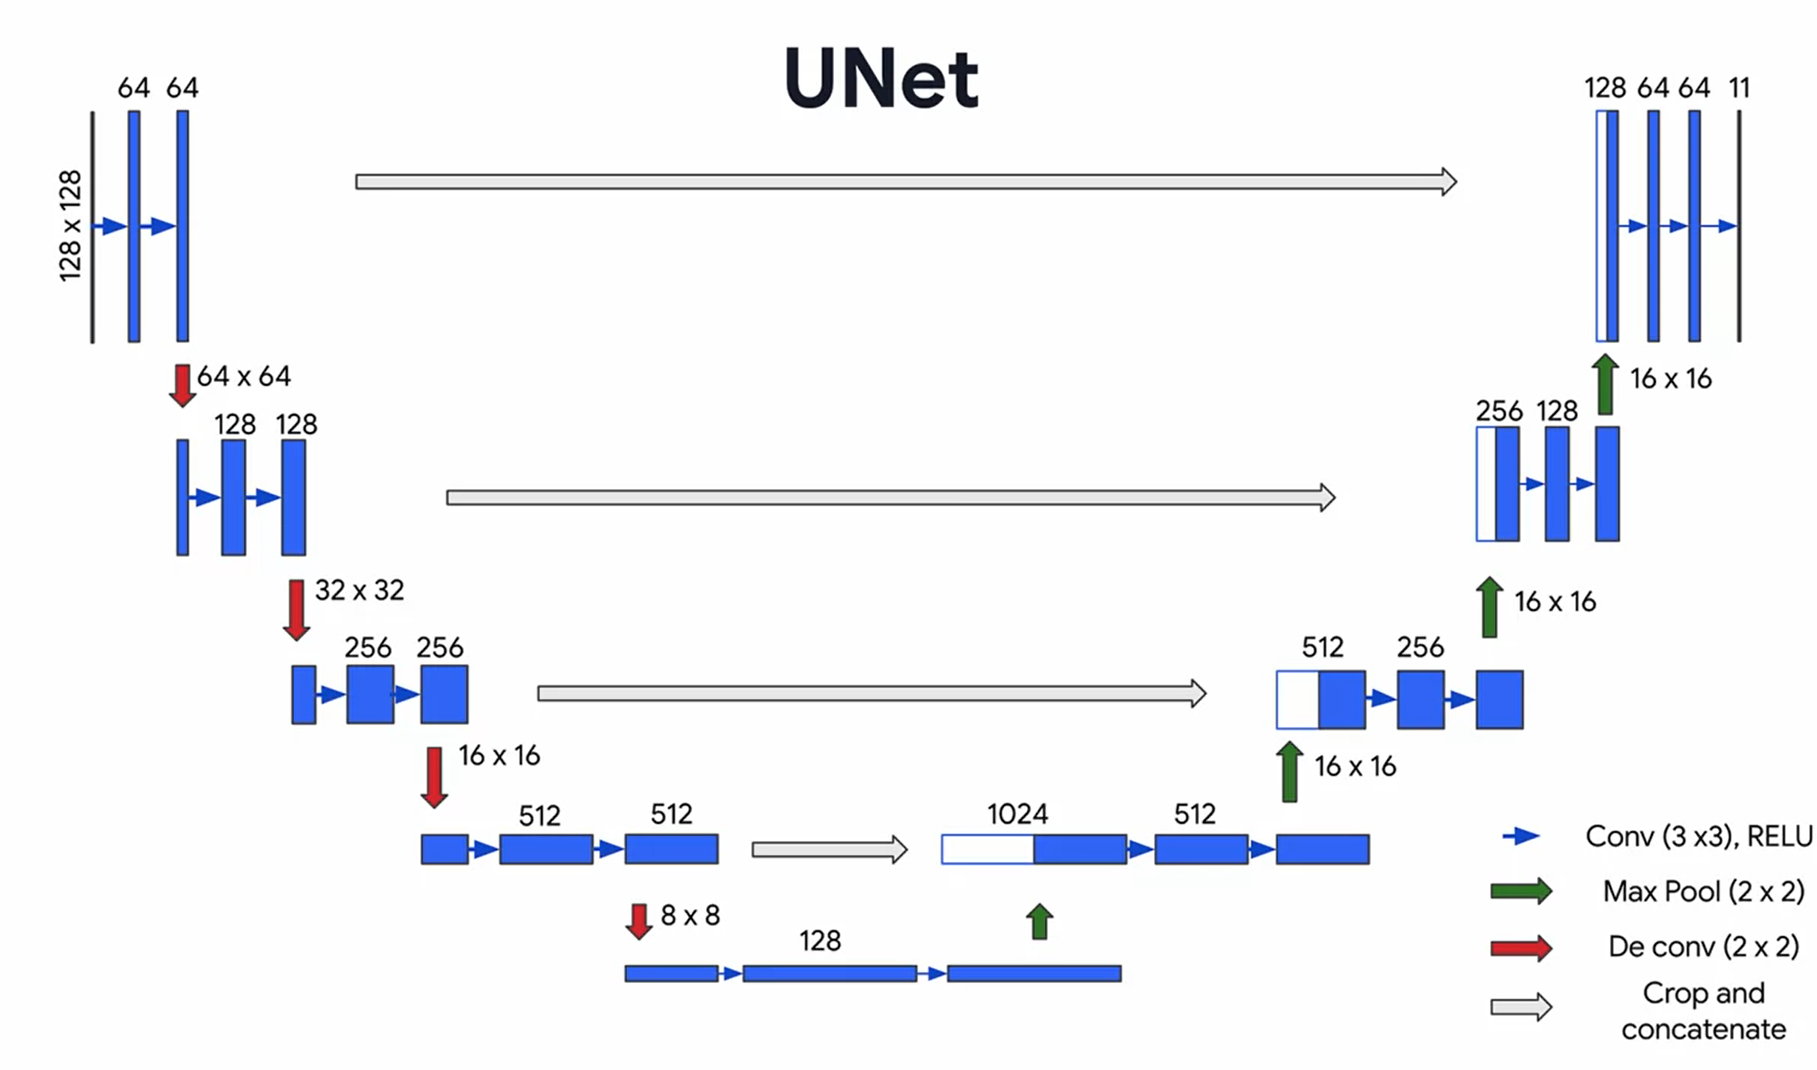
</div>

<b>Mask-RCNN</b>:

It adds additional layer after feature extraction for upsampling which converts object detection(Faster R-CNN) to segmenation model
<div>
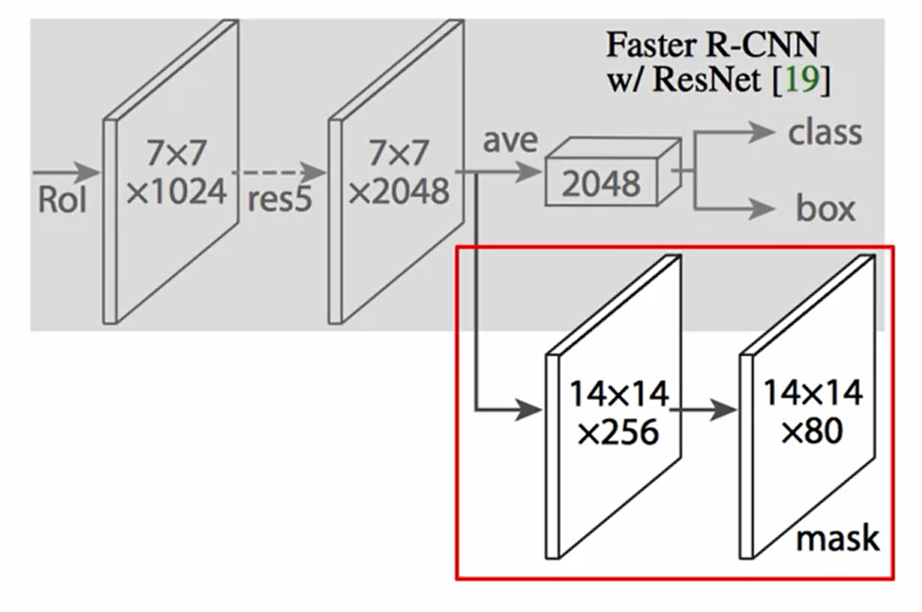
</div>

Evaluation for segmentation:

Area of overlap = sum(True positives)

Combined area = Total no of pixels in (predicted segmentaion mask + ground truth segmentation mask)

Area of union = Combined area - Area of overlap

<b>Intersection over union (IOU)</b> = Area of overlap/Area of union

<b>Dice Score</b>= 2* Area of overlap/Combined area

Diff b/w Dice score and IOU is Dice score tends to veer towards the average performance while IOU helps you understand worst case performance

In tensorflow implementation of droput we use inverse dropout

### Interpretation

<b>Class Activation Map(CAM)</b>:It shows what part of the image the model is paying attention to when deciding class of the image. It is a map of which pixels of image sent activations to determine class of image.

Interpolation is the process of estimating pixel values at non-interger coordinates within the image. It is usefule in resizing, cropping etc.

<b>Saliency Map</b>: It is representation of every pixel in the image in a way that makes sense for your particular context.
It is slightly different from CAM, where we show relevant pixels as opposed to location of detected features in the image, where those features impacted classification

<b>GradCAM</b>: It is class activation map that uses gradients of final classifications

<a href="https://arxiv.org/pdf/1610.02391.pdf">GradCAM</a>

<a href="https://arxiv.org/pdf/1311.2901.pdf">ZFNet</a>:
<div>
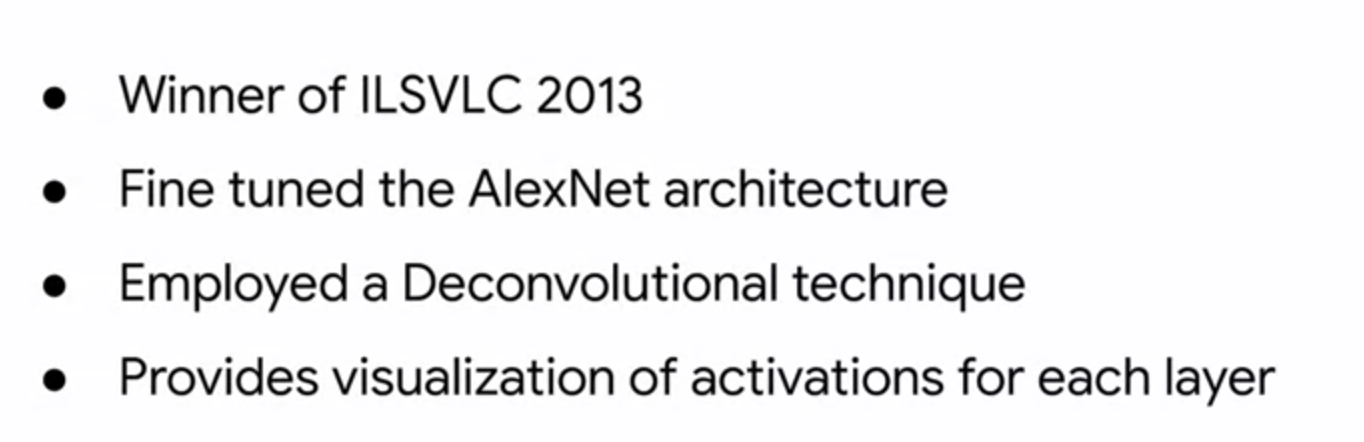
</div>
